In [2]:
import pandas as pnd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm 
from sklearn.metrics import accuracy_score

In [4]:
diabet = pnd.read_csv('diabetes.csv')
diabet.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabet.shape

(768, 9)

In [8]:
diabet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
diabet.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [12]:
diabet.isnull().values.any()

False

In [14]:
diabet.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
diabet.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
diabet["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

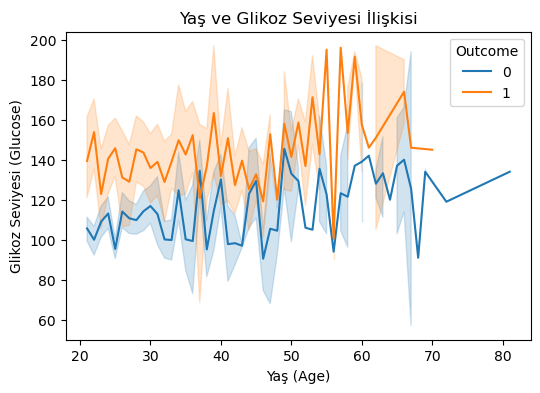

In [20]:
# Grafik boyutunu ayarlama
plt.figure(figsize=(6, 4))  # Genişlik 6, yükseklik 4 birim
# Çizgi grafiği
sns.lineplot(x="Age", y="Glucose", hue="Outcome", data=diabet)
# Grafiği düzenleme
plt.title("Yaş ve Glikoz Seviyesi İlişkisi")
plt.xlabel("Yaş (Age)")
plt.ylabel("Glikoz Seviyesi (Glucose)")
plt.legend(title="Outcome", loc="upper right")
plt.show()

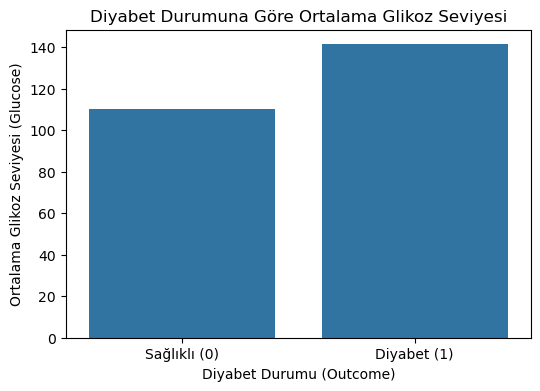

In [22]:
# Grafik boyutunu ayarlama
plt.figure(figsize=(6, 4))  # Genişlik 6, yükseklik 4 birim
# Sütun grafiği
sns.barplot(x="Outcome", y="Glucose", data=diabet, errorbar=None)
# Grafiği düzenleme
plt.title("Diyabet Durumuna Göre Ortalama Glikoz Seviyesi")
plt.xlabel("Diyabet Durumu (Outcome)")
plt.ylabel("Ortalama Glikoz Seviyesi (Glucose)")
plt.xticks(ticks=[0, 1], labels=["Sağlıklı (0)", "Diyabet (1)"])
plt.show()


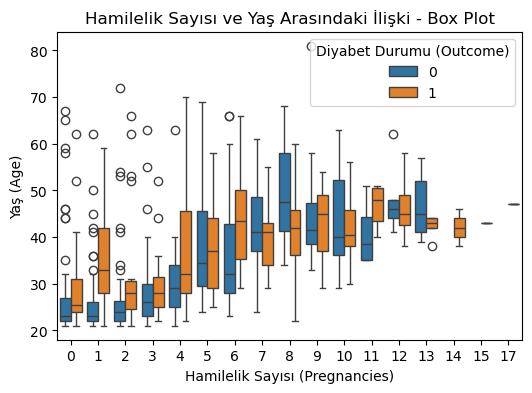

In [24]:
# Grafik boyutunu ayarlama
plt.figure(figsize=(6, 4))  # Genişlik 6, yükseklik 4 birim
# Boxplot (Hamilelik Sayısı ve Yaş Arasındaki İlişki)
sns.boxplot(x="Pregnancies", y="Age", hue="Outcome", data=diabet)
# Grafiği düzenleme
plt.title("Hamilelik Sayısı ve Yaş Arasındaki İlişki - Box Plot")
plt.xlabel("Hamilelik Sayısı (Pregnancies)")
plt.ylabel("Yaş (Age)")
plt.legend(title="Diyabet Durumu (Outcome)", loc="upper right")
plt.show()


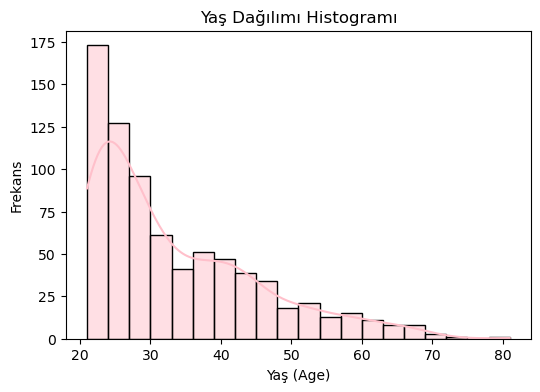

In [26]:
# Grafik boyutunu ayarlama ve histogram çizimi
plt.figure(figsize=(6, 4))  # Genişlik 6, yükseklik 4 birim
sns.histplot(data=diabet, x="Age", kde=True, color="pink", bins=20)

# Grafiği düzenleme
plt.title("Yaş Dağılımı Histogramı")
plt.xlabel("Yaş (Age)")
plt.ylabel("Frekans")
plt.show()

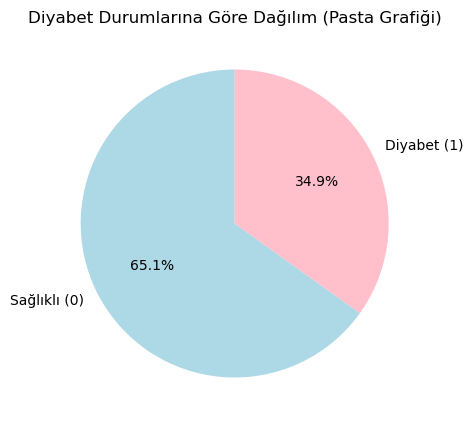

In [28]:
# Diyabet durumlarına göre dağılım (Outcome)
labels = ["Sağlıklı (0)", "Diyabet (1)"]
values = diabet["Outcome"].value_counts()
# Pasta grafiği
plt.figure(figsize=(5, 5))  # Grafik boyutunu ayarlama
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=["lightblue", "pink"])
plt.title("Diyabet Durumlarına Göre Dağılım (Pasta Grafiği)")
plt.show()

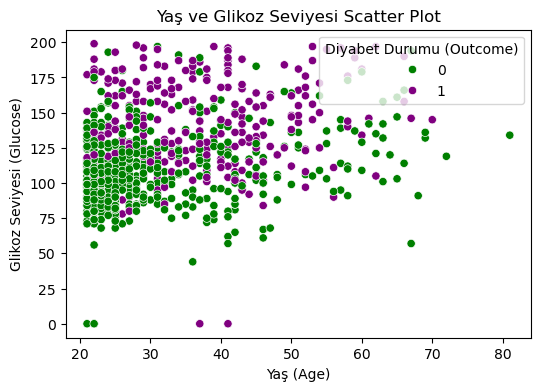

In [30]:
# Grafik boyutunu ayarlama
plt.figure(figsize=(6, 4))  # Genişlik 6, yükseklik 4 birim
# Scatter plot oluşturma
sns.scatterplot(x="Age", y="Glucose", hue="Outcome", data=diabet, palette=["green", "purple"])
# Grafiği düzenleme
plt.title("Yaş ve Glikoz Seviyesi Scatter Plot")
plt.xlabel("Yaş (Age)")
plt.ylabel("Glikoz Seviyesi (Glucose)")
plt.legend(title="Diyabet Durumu (Outcome)", loc="upper right")
plt.show()

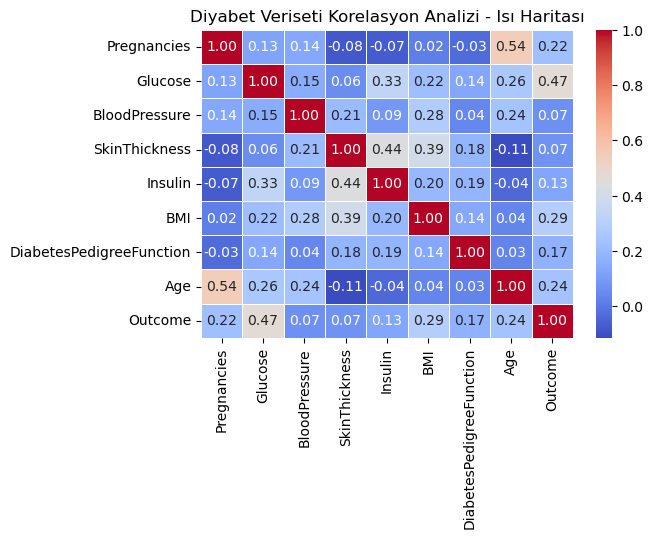

In [32]:
# Korelasyon analizi grafiği (Isı Haritası)
plt.figure(figsize=(6, 4))  # Grafik boyutunu ayarlama
correlation_matrix = diabet.corr()  # Korelasyon matrisi oluşturma
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# Grafiği düzenleme
plt.title("Diyabet Veriseti Korelasyon Analizi - Isı Haritası")
plt.show()

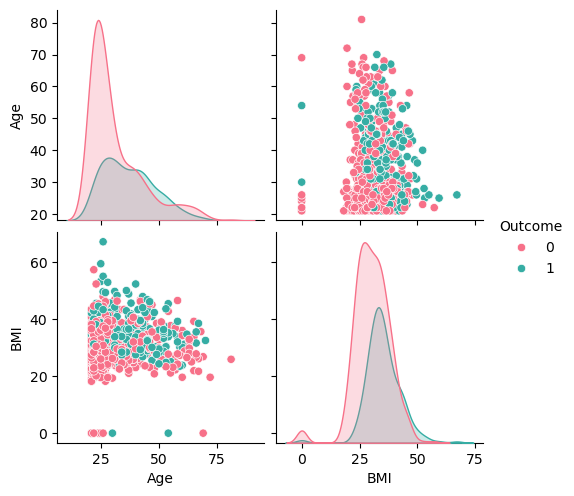

In [34]:
# İki değişken için Pair Plot
sns.pairplot(data=diabet, vars=["Age", "BMI"], hue="Outcome", palette="husl")
# Grafiği gösterme
plt.show()


In [36]:
# Korelasyon tablosu oluşturma
correlation_table = diabet.corr(numeric_only=True)
# Korelasyon tablosunu yazdırma
print(correlation_table)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

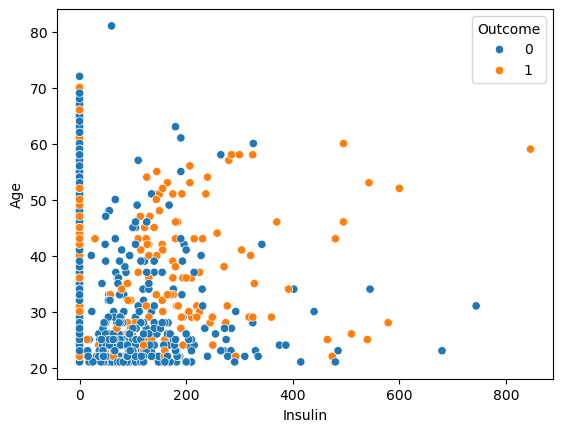

In [38]:
sns.scatterplot(x="Insulin",y="Age",hue="Outcome",data=diabet);

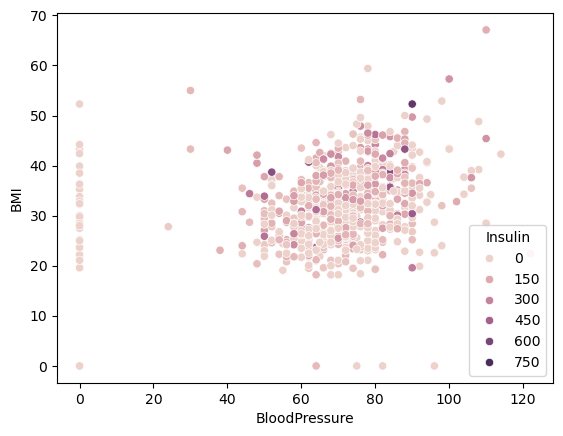

In [40]:
sns.scatterplot(x="BloodPressure",y="BMI",hue="Insulin",data=diabet);

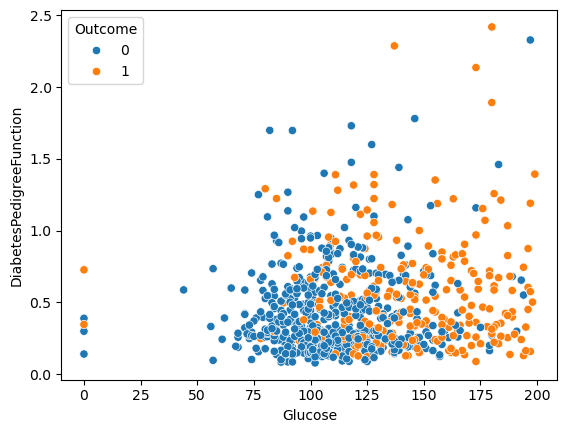

In [42]:
sns.scatterplot(x="Glucose",y="DiabetesPedigreeFunction",hue="Outcome",data=diabet);

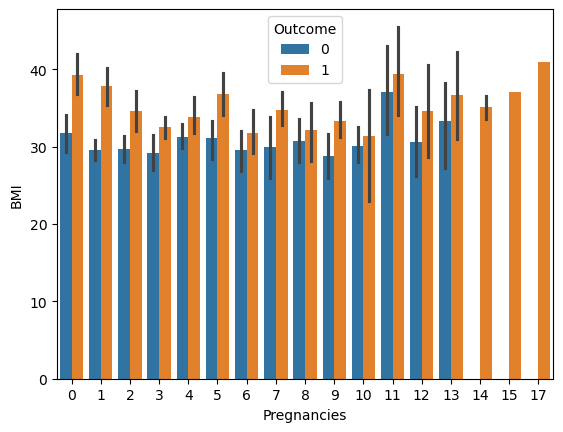

In [44]:
sns.barplot(x="Pregnancies",y="BMI",hue="Outcome",data=diabet);

In [46]:
diabet.groupby(["Pregnancies","Outcome"])["BMI"].mean()

Pregnancies  Outcome
0            0          31.727397
             1          39.213158
1            0          29.616038
             1          37.793103
2            0          29.679762
             1          34.578947
3            0          29.231250
             1          32.548148
4            0          31.255556
             1          33.873913
5            0          31.100000
             1          36.780952
6            0          29.591176
             1          31.775000
7            0          29.975000
             1          34.756000
8            0          30.693750
             1          32.204545
9            0          28.840000
             1          33.300000
10           0          30.114286
             1          31.380000
11           0          37.125000
             1          39.385714
12           0          30.560000
             1          34.575000
13           0          33.280000
             1          36.720000
14           1          35.

In [48]:
x = diabet.drop(["Outcome"],axis=1)
y = diabet["Outcome"]

In [50]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [52]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [54]:
scaler = StandardScaler()

In [56]:
scaler.fit(x)

StandardScaler()

In [58]:
standart_veri = scaler.transform(x)
standart_veri

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [60]:
x=standart_veri
y=diabet["Outcome"]

In [62]:
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [64]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [66]:
x_train, x_test,y_train, y_test= train_test_split(x,y,test_size=0.2,stratify=y,random_state=1)

In [68]:
x.shape,x_train.shape,x_test.shape

((768, 8), (614, 8), (154, 8))

In [70]:
sınıflandırıcı=svm.SVC(kernel='linear')

In [72]:
sınıflandırıcı.fit(x_train,y_train)

SVC(kernel='linear')

In [74]:
x_train_tahmin=sınıflandırıcı.predict(x_train)
egitim_verisi_dogruluk=accuracy_score(x_train_tahmin,y_train)

In [76]:
"Eğitim verilerimizin doğruluk puanı: ",egitim_verisi_dogruluk

('Eğitim verilerimizin doğruluk puanı: ', 0.7833876221498371)

In [78]:
x_test_tahmin=sınıflandırıcı.predict(x_test)
test_verisi_dogruluk=accuracy_score(x_test_tahmin,y_test)

In [80]:
"Test verilerinin doğruluk puanı: ",test_verisi_dogruluk

('Test verilerinin doğruluk puanı: ', 0.7792207792207793)

In [82]:
veri_girisi=(6,148,72,35,0,33.6,627,50)
veri_girisi_diziyap=np.asarray(veri_girisi)
veri_girisi_sekillendir=veri_girisi_diziyap.reshape(1,-1)
std_veri=scaler.transform(veri_girisi_sekillendir)
std_veri
tahmin=sınıflandırıcı.predict(std_veri)
tahmin
if(tahmin[0]==0):
    print("Kişi şeker hastası değil")
else:
    print("Kişi şeker hastası!")

Kişi şeker hastası!


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [122]:
import pandas as pnd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm 
from sklearn.metrics import accuracy_score

# Veriyi yükleme
diabet = pnd.read_csv('diabetes.csv')
diabet.head()


# Özellikler ve hedef değişkeni ayırma
x = diabet.drop(["Outcome"], axis=1)
y = diabet["Outcome"]

# Verileri ölçeklendirme
scaler = StandardScaler()
scaler.fit(x)
standart_veri = scaler.transform(x)

# Eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(standart_veri, y, test_size=0.2, stratify=y, random_state=1)

# SVM modelini oluşturma ve eğitme
sınıflandırıcı = svm.SVC(kernel='linear')
sınıflandırıcı.fit(x_train, y_train)

# Kullanıcıdan değerleri alma
pregnancies = float(input("Hamilelik sayısını girin: "))
glucose = float(input("Glikoz seviyesini girin: "))
blood_pressure = float(input("Kan basıncını girin: "))
skin_thickness = float(input("Cilt kalınlığını girin: "))
insulin = float(input("İnsülin seviyesini girin: "))
bmi = float(input("Vücut Kitle İndeksini girin: "))
diabetes_pedigree = float(input("Diabetes Pedigree Function değerini girin: "))
age = int(input("Yaşınızı girin: "))

# Kullanıcıdan alınan verileri bir diziye dönüştürme
veri_girisi = (pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree, age)
veri_girisi_diziyap = np.asarray(veri_girisi)

# Veriyi şekillendirme ve ölçeklendirme
veri_girisi_sekillendir = veri_girisi_diziyap.reshape(1, -1)
std_veri = scaler.transform(veri_girisi_sekillendir)

# Tahmin yapma
tahmin = sınıflandırıcı.predict(std_veri)

# Sonucu ekrana yazdırma
if tahmin[0] == 0:
    print("Kişi şeker hastası değil.")
else:
    print("Kişi şeker hastası!")

Hamilelik sayısını girin:  0
Glikoz seviyesini girin:  100
Kan basıncını girin:  34
Cilt kalınlığını girin:  80
İnsülin seviyesini girin:  81
Vücut Kitle İndeksini girin:  21
Diabetes Pedigree Function değerini girin:  0.8
Yaşınızı girin:  23


Kişi şeker hastası değil.


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [86]:
import os
print(os.getcwd())


/Users/duyguakkus/Yapay_zeka_ile_Diabet_Hastalik_Tahmin_Etme-master


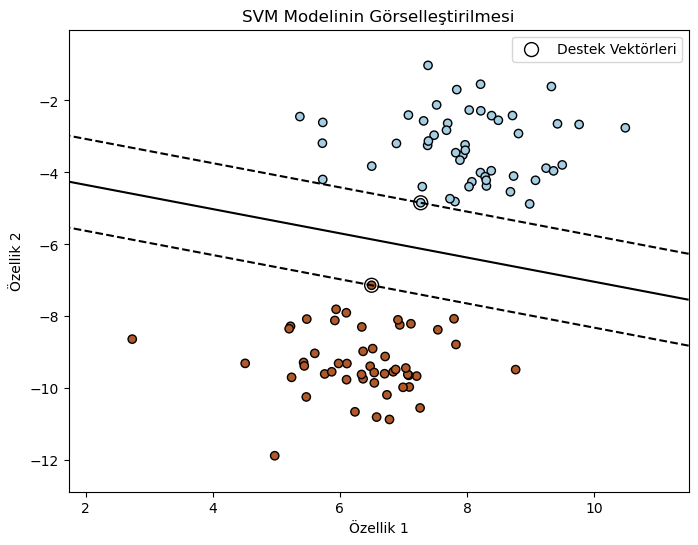

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# Veri oluşturma (örnek veri seti)
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

# SVM modelini oluşturma ve eğitme
model = svm.SVC(kernel='linear')
model.fit(X, y)

# Karar sınırını görselleştirme
plt.figure(figsize=(8, 6))

# Karar sınırını çizmek için bir grid oluşturma
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Karar fonksiyonu
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Karar sınırını ve marginleri çizme
plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')

# Destek vektörlerini vurgulama
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label="Destek Vektörleri")

# Veriyi çizme
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title("SVM Modelinin Görselleştirilmesi")
plt.xlabel("Özellik 1")
plt.ylabel("Özellik 2")
plt.legend()
plt.show()


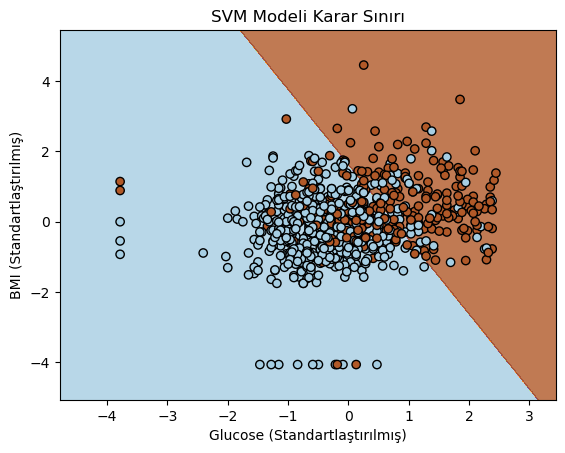

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Glucose ve BMI özelliklerini seçiyoruz
X = diabet[['Glucose', 'BMI']].values
y = diabet['Outcome'].values

# Verileri ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1, stratify=y)

# SVM modelini oluşturma ve eğitme
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Karar sınırını görselleştirme
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title("SVM Modeli Karar Sınırı")
    plt.xlabel("Glucose (Standartlaştırılmış)")
    plt.ylabel("BMI (Standartlaştırılmış)")
    plt.show()

# Görselleştirme
plot_decision_boundary(X_scaled, y, svm_model)


In [108]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print("LogisticRegression Doğruluk Oranı:", accuracy_score(y_test, predictions))

LogisticRegression Doğruluk Oranı: 0.7857142857142857


In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LogisticRegression()
model.fit(x_train_scaled, y_train)
predictions = model.predict(x_test_scaled)

print("Standard ScalerDoğruluk Oranı (Ölçeklendirme ile):", accuracy_score(y_test, predictions))

Standard ScalerDoğruluk Oranı (Ölçeklendirme ile): 0.7857142857142857


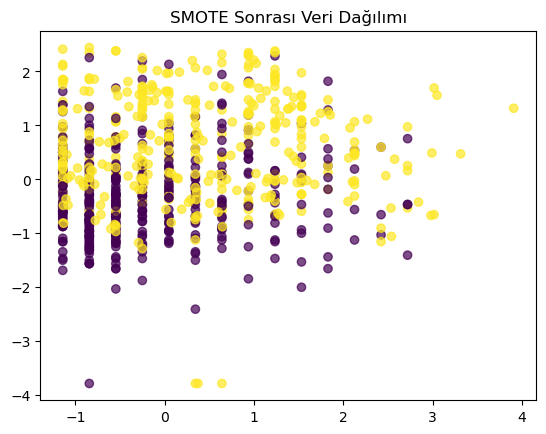

In [96]:
import matplotlib.pyplot as plt

plt.scatter(x_train_smote[:, 0], x_train_smote[:, 1], c=y_train_smote, cmap='viridis', alpha=0.7)
plt.title("SMOTE Sonrası Veri Dağılımı")
plt.show()

In [112]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid.fit(x_train_smote, y_train_smote)

best_model = grid.best_estimator_
predictions = best_model.predict(x_test)

print(" GridSearchCV Doğruluk Oranı (Optimize):", accuracy_score(y_test, predictions))

 GridSearchCV Doğruluk Oranı (Optimize): 0.7597402597402597


In [100]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
x_train_adasyn, y_train_adasyn = adasyn.fit_resample(x_train, y_train)

model.fit(x_train_adasyn, y_train_adasyn)
predictions = model.predict(x_test)

print("Doğruluk Oranı (ADASYN):", accuracy_score(y_test, predictions))

Doğruluk Oranı (ADASYN): 0.7532467532467533


In [118]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Logistic Regression modelini oluştur ve eğit
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

# Kullanıcıdan değerleri alma
pregnancies = float(input("Hamilelik sayısını girin: "))
glucose = float(input("Glikoz seviyesini girin: "))
blood_pressure = float(input("Kan basıncını girin: "))
skin_thickness = float(input("Cilt kalınlığını girin: "))
insulin = float(input("İnsülin seviyesini girin: "))
bmi = float(input("Vücut Kitle İndeksini girin: "))
diabetes_pedigree = float(input("Diabetes Pedigree Function değerini girin: "))
age = int(input("Yaşınızı girin: "))

# Kullanıcıdan alınan değerleri bir diziye dönüştürme
veri_girisi = (pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree, age)
veri_girisi_diziye = np.asarray(veri_girisi)

# Veriyi şekillendirme ve ölçeklendirme
veri_girisi_sekillendir = veri_girisi_diziye.reshape(1, -1)
std_veri = scaler.transform(veri_girisi_sekillendir)

# Kullanıcıdan alınan verileri Logistic Regression ile tahmin et
tahmin = logistic_model.predict(std_veri)

# Sonucu yazdır
if tahmin[0] == 0:
    print("Kişi şeker hastası değil.")
else:
    print("Kişi şeker hastası!")


Hamilelik sayısını girin:  1
Glikoz seviyesini girin:  100
Kan basıncını girin:  80
Cilt kalınlığını girin:  20
İnsülin seviyesini girin:  80
Vücut Kitle İndeksini girin:  22.0
Diabetes Pedigree Function değerini girin:  0.5
Yaşınızı girin:  25


Kişi şeker hastası!
